In [1]:
using SymPy
using Plots

In [58]:
eps, vs, gamma, mu = symbols("ε, v_s, γ, μ", real=true)

(ε, v_s, γ, μ)

In [3]:
a = [2/eps - vs/eps^2, 2/eps + vs/eps^2]

2-element Array{Sym,1}:
 -v_s/ε^2 + 2/ε
  v_s/ε^2 + 2/ε

In [69]:
f = [(a[1]+gamma)^2 + 4*(1+1/eps^2)*vs*a[1], (a[2]+gamma)^2 + 4*(1-1/eps^2)*vs*a[2]]

2-element Array{Sym,1}:
 v_s*(4 + 4/ε^2)*(-v_s/ε^2 + 2/ε) + (-v_s/ε^2 + γ + 2/ε)^2
   v_s*(4 - 4/ε^2)*(v_s/ε^2 + 2/ε) + (v_s/ε^2 + γ + 2/ε)^2

In [56]:
maximum([subs(subs(subs(f[2], gamma, g), vs, v), eps, e) for g in 0:0.1:1 for v in -2:0.1:-0.01 for e in 0.0005:0.0005:0.001])

-29595960800.0000

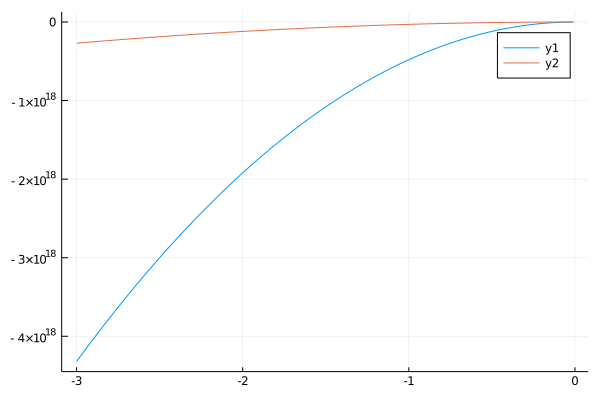

In [33]:
vss = -3:0.01:-0.01
es = 0.00005:0.00005:0.0001
ysg = [subs(subs(f[1], gamma, 0.5), vs, v) for v in vss]
ys = [Float64(subs(y, eps, es[1])) for y in ysg]
plt = plot(vss, ys)
for i in es[2:end]
    ys1 = [Float64(subs(y, eps, i)) for y in ysg]
    plot!(plt, vss, ys1)
end
plot(plt)

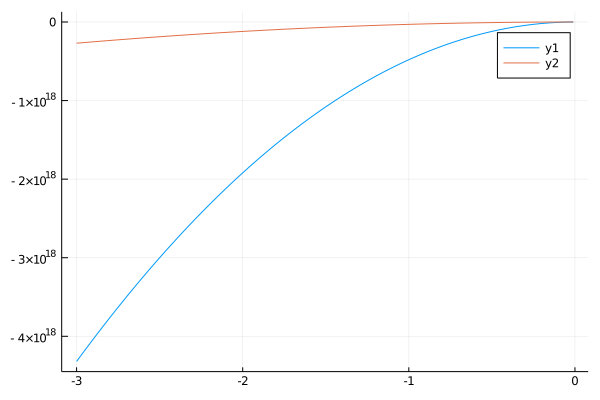

In [35]:
vss = -3.0:0.01:-0.01
es = 0.00005:0.00005:0.0001
ysg = [subs(subs(f[2], gamma, 1.5), vs, v) for v in vss]
ys = [Float64(subs(y, eps, es[1])) for y in ysg]
plt = plot(vss, ys)
for i in es[2:end]
    ys1 = [Float64(subs(y, eps, i)) for y in ysg]
    plot!(plt, vss, ys1)
end
plot(plt)

In [73]:
f2 = [(gamma^2)/4 + mu, (gamma^2)/4 - mu]
r2 = [-gamma/2 + sqrt((gamma^2)/4 + mu), -gamma/2 - sqrt((gamma^2)/4 + mu),
-gamma/2 + sqrt((gamma^2)/4 - mu), -gamma/2 - sqrt((gamma^2)/4 - mu)]

4-element Array{Sym,1}:
 -γ/2 + sqrt(γ^2/4 + μ)
 -γ/2 - sqrt(γ^2/4 + μ)
 -γ/2 + sqrt(γ^2/4 - μ)
 -γ/2 - sqrt(γ^2/4 - μ)

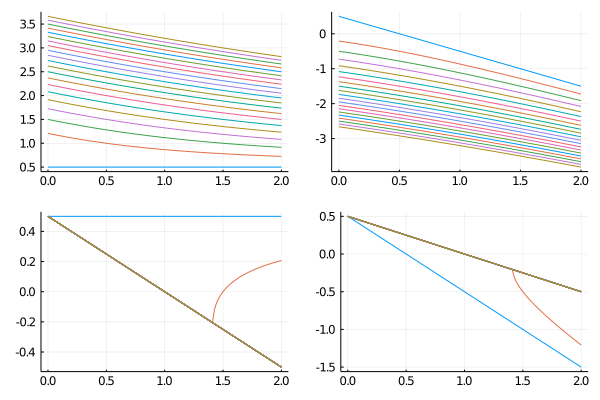

In [91]:
vss = -3.0:0.1:-0.01
mus = 0:0.5:10
gs = 0:0.01:2
plts = [plot(), plot(), plot(), plot()]

for i in mus
    ys1 = [Float64(subs(subs(subs(r2[1] + 0.5, mu, i), gamma, g), vs, -0.5)) for g in gs]
    ys2 = [Float64(subs(subs(subs(r2[2] + 0.5, mu, i), gamma, g), vs, -0.5)) for g in gs]
    ys3 = [Float64(real(subs(subs(subs(r2[3] + 0.5, mu, i), gamma, g), vs, -0.5))) for g in gs]
    ys4 = [Float64(real(subs(subs(subs(r2[4] + 0.5 , mu, i), gamma, g), vs, -0.5))) for g in gs]
    plot!(plts[1], gs, ys1)
    plot!(plts[2], gs, ys2)
    plot!(plts[3], gs, ys3)
    plot!(plts[4], gs, ys4)
end
plot(plts[1], plts[2], plts[3], plts[4], layout = (2,2), legend=false)
#plot(plts[1])

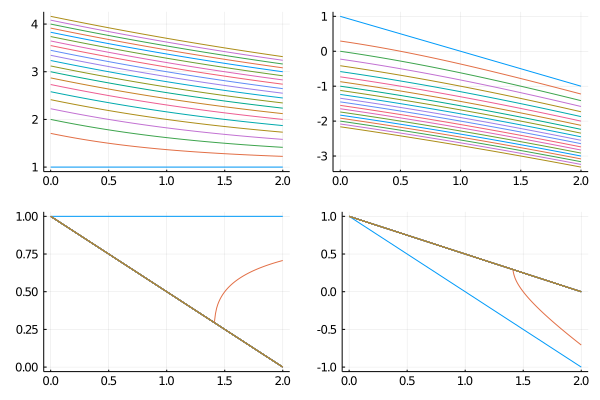

In [92]:
vss = -3.0:0.1:-0.01
mus = 0:0.5:10
gs = 0:0.01:2
plts = [plot(), plot(), plot(), plot()]

for i in mus
    ys1 = [Float64(subs(subs(subs(r2[1] + 1, mu, i), gamma, g), vs, -1)) for g in gs]
    ys2 = [Float64(subs(subs(subs(r2[2] + 1, mu, i), gamma, g), vs, -1)) for g in gs]
    ys3 = [Float64(real(subs(subs(subs(r2[3] + 1, mu, i), gamma, g), vs, -1))) for g in gs]
    ys4 = [Float64(real(subs(subs(subs(r2[4] + 1 , mu, i), gamma, g), vs, -1))) for g in gs]
    plot!(plts[1], gs, ys1)
    plot!(plts[2], gs, ys2)
    plot!(plts[3], gs, ys3)
    plot!(plts[4], gs, ys4)
end
plot(plts[1], plts[2], plts[3], plts[4], layout = (2,2), legend=false)
#plot(plts[1])